Total data points are: 1000000
Mean is:  0.5002389878476553
varience is:  0.08327335322660369
Standard Deviation is:  0.2885712273020366
Percentage error in mean is: 0.047797569531060624
Percentage error in variance is: -0.07197612807556819


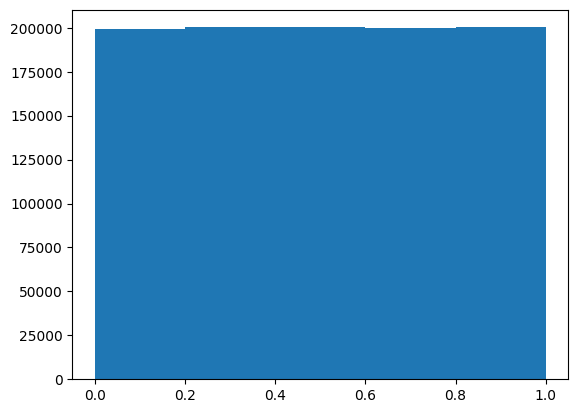

In [1]:
""" Random number generation using python's RNG"""
import numpy as np
import random
import matplotlib.pyplot as plt
# Generating random numbers and computing their mean, variance and standard deviation
n = int(input("Enter number of random numbers you want to generate: "))
a = []
while True:
    x = random.uniform(0,1)
    a.append(x)
    if len(a) == n:
        break
mean = np.mean(a)
variance = np.var(a)
standard_deviation = np.std(a)
# calculating relative errors
per_err_mean = ((mean-0.5)/0.5)*100
per_err_var = ((variance - (1/12))/(1/12))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)

# plotting 
plt.hist(a,5)
plt.show()

Total data points are: 1000000
Mean is:  0.5000264761740889
varience is:  0.08331040801016605
Standard Deviation is:  0.2886354240389874
Percentage error in mean is: 0.005295234817781491
Percentage error in variance is: -0.027510387800733227


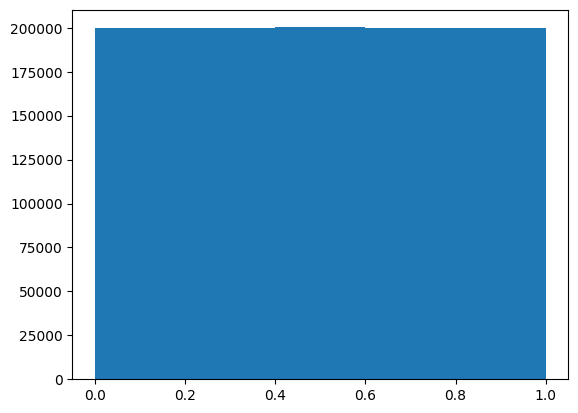

In [2]:
""" Random number generation using numpy's RNG"""
import numpy as np
import matplotlib.pyplot as plt
n = int(input("Enter number of random numbers you want to generate:"))
# Random number generation
rng = np.random.default_rng(42)
a = rng.uniform(0,1,n)
mean = np.mean(a)
variance = np.var(a)
standard_deviation = np.std(a)
# calculating relative errors
per_err_mean = ((mean-0.5)/0.5)*100
per_err_var = ((variance - (1/12))/(1/12))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)

# plotting 
plt.hist(a,5)
plt.show()

Total data points are: 1000000
Mean is:  0.5000264761740889
varience is:  0.08331040801016605
Standard Deviation is:  0.999836236760975
Percentage error in mean is: -49.99735238259111
Percentage error in variance is: -91.66895919898339


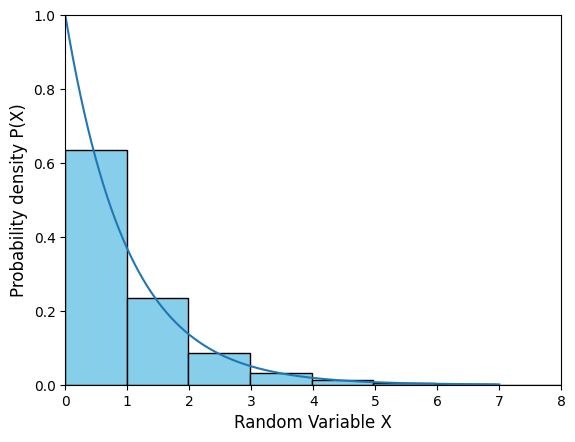

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def inv_cdf(lmbda, u):
    x = -(1/lmbda)*np.log(u)
    return x
n = int(input("Enyer the number of random numbers you want to generate"))
rng = np.random.default_rng(42)
a = rng.uniform(0,1,n)
l = 1
y = inv_cdf(l,a)
standard_deviation = np.std(y)
# calculating true function
y1 = np.linspace(0, 7, num=100000)
x1 = l*np.exp(-l*y1)
# calculating relative errors
per_err_mean = ((mean-(1/l))/(1/l))*100
per_err_var = ((variance - (1/l**2))/(1/l**2))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)

# plotting 
plt.xlim(0, 8)
plt.ylim(0.0, 1.0)
plt.xlabel("Random Variable X", fontsize=12)
plt.ylabel("Probability density P(X)", fontsize=12)
plt.hist(y, bins=16, density=True, color='skyblue', edgecolor='black')
plt.plot(y1,x1)
plt.show()

Total data points are: 1000000
Mean is:  0.6667143198057801
varience is:  0.055474269632888165
Acceptance rate is: 0.5002336090954476
Standard Deviation is:  0.23552976379406523
Percentage error in mean is: 0.007147970867021902
Percentage error in variance is: -0.14631466080129718


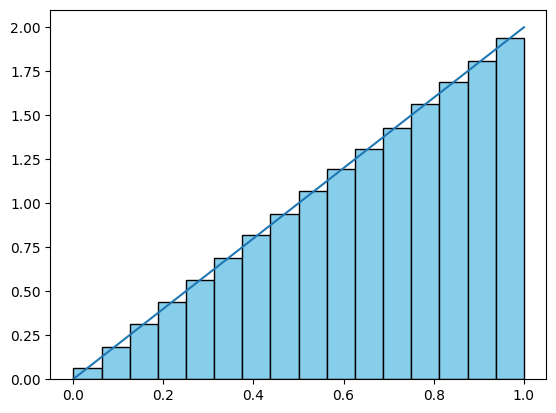

/home/kelvin/github/ml_coding/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


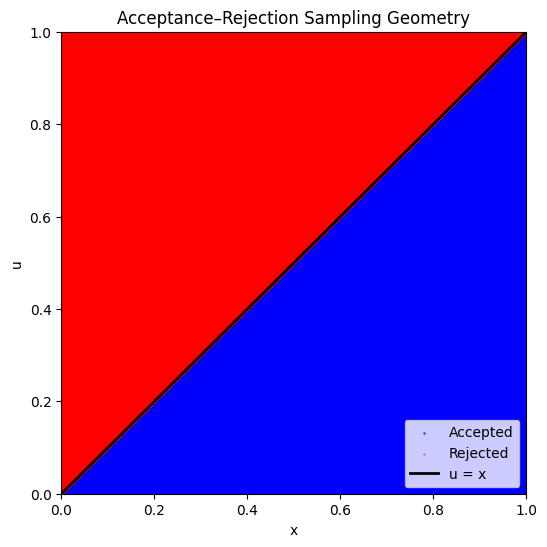

In [4]:
import numpy as np
import matplotlib.pyplot as plt
n = int(input("Enter number of samples you need to be accepted: "))
rng = np.random.default_rng(42)
i,j = 0,0
a = []
x_all = []
u_all = []
accepted = []
# ACCEPTANCE REJECTION ALGORITHM
while True:
    j = j+1
    u = rng.uniform(0,1)
    x = rng.uniform(0,1)
    u_all.append(u)
    x_all.append(x)
    if u <= x:
        a.append(x)
        accepted.append(True)
        i = i+1
    else:
        accepted.append(False)
    if i == n:
        break
mean = np.mean(a)
variance = np.var(a)
standard_deviation = np.std(a)
acc_rate = i/j
# calculating relative errors
per_err_mean = ((mean-(2/3))/(2/3))*100
per_err_var = ((variance - (1/18))/(1/18))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Acceptance rate is:", acc_rate)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)
# True Value
x1 = np.linspace(0,1,10000)
y1 = 2*x1

# Plotting
plt.hist(a, bins=16, density=True, color='skyblue', edgecolor='black')
plt.plot(x1,y1)
plt.show()
plt.figure(figsize=(6,6))

# Convert to numpy arrays
x_all = np.array(x_all)
u_all = np.array(u_all)
accepted = np.array(accepted)

# Plot accepted points
plt.scatter(
    x_all[accepted],
    u_all[accepted],
    s=1,
    color='blue',
    alpha=0.5,
    label='Accepted'
)

# Plot rejected points
plt.scatter(
    x_all[~accepted],
    u_all[~accepted],
    s=1,
    color='red',
    alpha=0.3,
    label='Rejected'
)

# Acceptance boundary u = x
xx = np.linspace(0,1,200)
plt.plot(xx, xx, color='black', lw=2, label='u = x')

plt.xlabel("x")
plt.ylabel("u")
plt.legend()
plt.title("Acceptance–Rejection Sampling Geometry")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()



In [5]:
import numpy as np
import matplotlib.pyplot as plt
n = [100, 1000, 10000, 100000, 1000000]
rng = np.random.default_rng(42)
print("n", "\tIntegral", "\tError")
for j in range(len(n)):
    s,i = 0.0,0
    while True:
        x = rng.uniform(0,1)
        s = s + x**2
        i = i + 1
        if i == n[j]:
            break
    integral = s/n[j]
    true_int = 1/3
    e_n = abs(true_int-integral)
    print(n[j], "\t", f'{integral:.6f}', "\t", f'{e_n:.6f}')

n 	Integral 	Error
100 	 0.311014 	 0.022319
1000 	 0.336358 	 0.003024
10000 	 0.331817 	 0.001516
100000 	 0.334303 	 0.000970
1000000 	 0.333144 	 0.000189


In [6]:
import numpy as np
def inv_cdf(u):
    return u**(1/3)
n = int(input("Enter number of samples you want to use:"))
rng = np.random.default_rng(42)
s,i = 0.0,0
while True:
    a = rng.uniform(0,1)
    y = inv_cdf(a)
    s = s + ((y**2)/(3*y**2))
    i = i+1
    if i==n:
        break
integral = s/n
print("Integral is", integral)

Integral is 0.3333333333322413


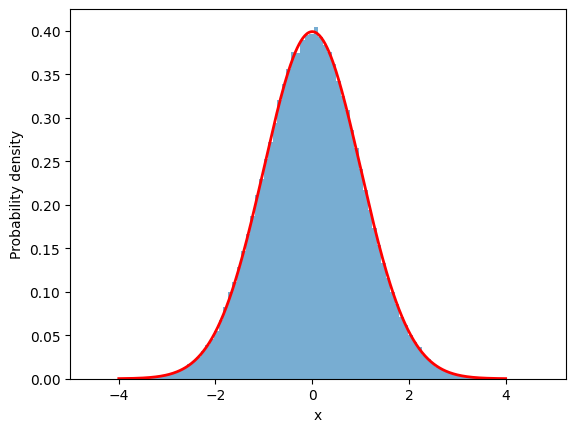

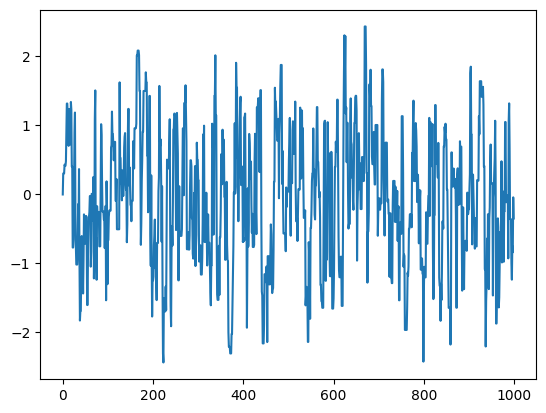

In [7]:
import numpy as np
import matplotlib.pyplot as plt
n = int(input("Enter number of samples you want to generate:"))
sigma = 1.0
rng = np.random.default_rng(42)
x = np.zeros(n)
x[0] = 0.0
for i in range(1,n):
    x_current = x[i-1]
    x_proposal = x_current + rng.normal(0,sigma)
    log_accp_ratio = (-(x_proposal**2 - x_current**2)/2)
    rand = np.log(rng.uniform())
    if rand < log_accp_ratio:
        x[i] = x_proposal
    else:
        x[i] = x_current
xx = np.linspace(-4, 4, 400)
gaussian = np.exp(-xx**2 / 2) / np.sqrt(2*np.pi)
plt.hist(x, bins=100, density=True, alpha=0.6)
plt.plot(xx, gaussian, 'r', lw=2)
plt.xlabel("x")
plt.ylabel("Probability density")
plt.show()
plt.plot(x[:1000])
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
n = int(input("Enter number of samples you want to generate:"))
sigma = 1.0
delta_xm_val = np.logspace(0.29,0.31,50)
rng = np.random.default_rng(42)
for k in range(len(delta_xm_val)):
    x = np.zeros(n)
    x[0] = 0.0
    j = 0
    for i in range(1,n):
        x_current = x[i-1]
        x_proposal = x_current + rng.normal(0,delta_xm_val[k])
        log_accp_ratio = (-(x_proposal**2 - x_current**2)/(2*sigma**2))
        rand = np.log(rng.uniform())
        if rand < log_accp_ratio:
            x[i] = x_proposal
            j = j+1
        else:
            x[i] = x_current
    accp_rate = j/(n-1)
    print(f'{delta_xm_val[k]:.6f}', "\t", f'{accp_rate:.6f}')

1.949845 	 0.509051
1.951678 	 0.508851
1.953513 	 0.504950
1.955350 	 0.504350
1.957188 	 0.497850
1.959029 	 0.500850
1.960871 	 0.509051
1.962715 	 0.504050
1.964560 	 0.505251
1.966407 	 0.511151
1.968256 	 0.512551
1.970107 	 0.507651
1.971959 	 0.506651
1.973814 	 0.502650
1.975669 	 0.501150
1.977527 	 0.504150
1.979387 	 0.501650
1.981248 	 0.496650
1.983111 	 0.503850
1.984975 	 0.506051
1.986842 	 0.501950
1.988710 	 0.507151
1.990580 	 0.500350
1.992451 	 0.507251
1.994325 	 0.496450
1.996200 	 0.497450
1.998077 	 0.507151
1.999956 	 0.500950
2.001836 	 0.488149
2.003719 	 0.505551
2.005603 	 0.502650
2.007488 	 0.495750
2.009376 	 0.494949
2.011265 	 0.498850
2.013157 	 0.506651
2.015049 	 0.505851
2.016944 	 0.489549
2.018841 	 0.493549
2.020739 	 0.491249
2.022639 	 0.493449
2.024541 	 0.498250
2.026444 	 0.486549
2.028350 	 0.489749
2.030257 	 0.494149
2.032166 	 0.498750
2.034077 	 0.501850
2.035989 	 0.492949
2.037904 	 0.493249
2.039820 	 0.495950
2.041738 	 0.488549


In [10]:
import numpy as np
import matplotlib.pyplot as plt
n = int(input("Enter number of samples you want to generate:"))
burn_in = n//5
sigma = 1.0
rng = np.random.default_rng(42)
x = np.zeros(n)
x[0] = 0.0
j = 0
delta_xm = 1.996375
for i in range(1,n):
    x_current = x[i-1]
    x_proposal = x_current + rng.normal(0,delta_xm)
    log_accp_ratio = (-(x_proposal**2 - x_current**2)/(2*sigma**2))
    rand = np.log(rng.uniform())
    if rand < log_accp_ratio:
        x[i] = x_proposal
        j = j+1
    else:
        x[i] = x_current
samples = x[burn_in:]
# ESTIMATES
mean_x = np.mean(samples)
mean_x2 = np.mean(samples**2)

print("⟨x⟩  =", mean_x)
print("⟨x²⟩ =", mean_x2)
print("Exact ⟨x²⟩ =", sigma**2)
print("Acceptance rate =", j/(n-1))

⟨x⟩  = -0.0027118263818759246
⟨x²⟩ = 1.0125121810295776
Exact ⟨x²⟩ = 1.0
Acceptance rate = 0.4994249942499425


Total samples generated: 1000000
⟨x⟩  = 0.0004285240997446276
⟨x²⟩ = 1.0009303990695044
Exact ⟨x²⟩ = 1.0
Acceptance rate = 0.5000385000385
Integrated autocorrelation time: 4.449963375187908
Effective sample size: 89888.38025731151


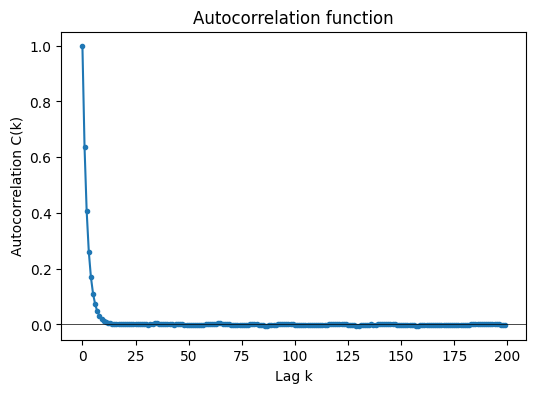

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def autocorrelation(x, max_lag):
    x = np.asarray(x)
    x = x - np.mean(x)
    var = np.var(x)
    acf = np.zeros(max_lag)
    for k in range(max_lag):
        acf[k] = np.mean(x[:len(x)-k] * x[k:]) / var
    return acf
n = int(input("Enter number of samples you want to generate:"))
burn_in = n//5
sigma = 1.0
rng = np.random.default_rng(42)
x = np.zeros(n)
x[0] = 0.0
j = 0
delta_xm = 1.996375
for i in range(1,n):
    x_current = x[i-1]
    x_proposal = x_current + rng.normal(0,delta_xm)
    log_accp_ratio = (-(x_proposal**2 - x_current**2)/(2*sigma**2))
    rand = np.log(rng.uniform())
    if rand < log_accp_ratio:
        x[i] = x_proposal
        j = j+1
    else:
        x[i] = x_current
samples = x[burn_in:]
# ESTIMATES
mean_x = np.mean(samples)
mean_x2 = np.mean(samples**2)
print("Total samples generated:", n)
print("⟨x⟩  =", mean_x)
print("⟨x²⟩ =", mean_x2)
print("Exact ⟨x²⟩ =", sigma**2)
print("Acceptance rate =", j/(n-1))
max_lag = 200
acf = autocorrelation(samples, max_lag)
tau_int = 1 + 2*np.sum(acf[1:])
print("Integrated autocorrelation time:", tau_int)
N_eff = len(samples) / (2 * tau_int)
print("Effective sample size:", N_eff)
plt.figure(figsize=(6,4))
plt.plot(acf, marker='o', markersize=3)
plt.xlabel("Lag k")
plt.ylabel("Autocorrelation C(k)")
plt.title("Autocorrelation function")
plt.axhline(0, color='black', lw=0.5)
plt.show()


In [12]:
import numpy as np

# -----------------------------
# PARAMETERS
# -----------------------------
sigma = 1.0
target_accept = 0.5

n_tune = 5000        # steps per tuning round
n_rounds = 50        # number of adaptation rounds
gamma = 0.2         # adaptation strength

rng = np.random.default_rng(42)

# initial guess
delta_xm = sigma
x = 0.0
print("Tuning Δx_m for sigma =", sigma)
print("Round   Δx_m      Acceptance")

# -----------------------------
# TUNING LOOP
# -----------------------------
for r in range(n_rounds):
    
    accepts = 0

    for i in range(n_tune):
        x_prop = x + rng.normal(0, delta_xm)
        log_alpha = -(x_prop**2 - x**2) / (2 * sigma**2)

        if np.log(rng.uniform()) < log_alpha:
            x = x_prop
            accepts += 1

    acc_rate = accepts / n_tune

    # multiplicative update
    delta_xm *= np.exp(gamma * (acc_rate - target_accept))

    print(f"{r:3d}   {delta_xm:.6f}   {acc_rate:.4f}")


Tuning Δx_m for sigma = 1.0
Round   Δx_m      Acceptance
  0   1.043145   0.7112
  1   1.084067   0.6924
  2   1.125469   0.6874
  3   1.164906   0.6722
  4   1.203459   0.6628
  5   1.240606   0.6520
  6   1.278388   0.6500
  7   1.313375   0.6350
  8   1.343449   0.6132
  9   1.375256   0.6170
 10   1.406016   0.6106
 11   1.436199   0.6062
 12   1.468557   0.6114
 13   1.495708   0.5916
 14   1.522205   0.5878
 15   1.545890   0.5772
 16   1.569191   0.5748
 17   1.594882   0.5812
 18   1.620346   0.5792
 19   1.644309   0.5734
 20   1.666291   0.5664
 21   1.689175   0.5682
 22   1.707585   0.5542
 23   1.723712   0.5470
 24   1.741244   0.5506
 25   1.759166   0.5512
 26   1.772587   0.5380
 27   1.784396   0.5332
 28   1.796643   0.5342
 29   1.807383   0.5298
 30   1.820735   0.5368
 31   1.828617   0.5216
 32   1.839107   0.5286
 33   1.851359   0.5332
 34   1.857219   0.5158
 35   1.864737   0.5202
 36   1.868620   0.5104
 37   1.876710   0.5216
 38   1.886569   0.5262
 39   1

In [13]:
import numpy as np
sigma = 1
tar_acc = 0.5
gamma = 0.1
rng = np.random.default_rng(42)
detla_xm = sigma
while True:
    x = 0.0
    acc = 0
    i = 0
    while True:
        x_prop = x+rng.normal(0,delta_xm)
        log_acc = -(x_prop**2 - x**2)/(2*sigma**2)
        rand = np.log(rng.uniform())
        i = i + 1
        if rand < log_acc:
            x = x_prop
            acc += 1
        if i == 2000:
            break
    acc_rate = acc/i
    delta_xm*=np.exp(gamma*(acc_rate - tar_acc))
    if abs(acc_rate - tar_acc)<0.02:
        break
print(delta_xm)

1.9508984303824242


In [14]:
import numpy as np

sigma = 1.0
target_acc = 0.5
gamma = 0.14

n_tune = 2000
tol = 0.02
stable_rounds = 3

rng = np.random.default_rng(42)

delta_xm = sigma
x = 0.0
stable_count = 0

while True:
    accepted = 0

    for i in range(n_tune):
        x_prop = x + rng.normal(0, delta_xm)
        log_acc = -(x_prop**2 - x**2) / (2 * sigma**2)

        if np.log(rng.uniform()) < log_acc:
            x = x_prop
            accepted += 1

    acc_rate = accepted / n_tune

    delta_xm *= np.exp(gamma * (acc_rate - target_acc))

    if abs(acc_rate - target_acc) < tol:
        stable_count += 1
    else:
        stable_count = 0

    if stable_count >= stable_rounds:
        break

print("Optimized delta_xm =", delta_xm)


Optimized delta_xm = 1.9193373571779013


In [15]:
import numpy as np

def tune_delta_xm_user(seed, sigma=1.0):
    rng = np.random.default_rng(seed)
    delta_xm = sigma
    gamma = 0.1
    target_acc = 0.5
    n_tune = 2000

    while True:
        x = 0.0
        accepted = 0

        for i in range(n_tune):
            x_prop = x + rng.normal(0, delta_xm)
            log_acc = -(x_prop**2 - x**2) / (2 * sigma**2)
            if np.log(rng.uniform()) < log_acc:
                x = x_prop
                accepted += 1

        acc_rate = accepted / n_tune
        delta_xm *= np.exp(gamma * (acc_rate - target_acc))

        if abs(acc_rate - target_acc) < 0.02:
            break

    return delta_xm


In [16]:
def tune_delta_xm_rm(seed, sigma=1.0):
    rng = np.random.default_rng(seed)
    delta_xm = sigma
    gamma = 0.15
    target_acc = 0.5

    n_tune = 2000
    tol = 0.02
    stable_rounds = 3

    x = 0.0
    stable_count = 0

    while True:
        accepted = 0

        for i in range(n_tune):
            x_prop = x + rng.normal(0, delta_xm)
            log_acc = -(x_prop**2 - x**2) / (2 * sigma**2)
            if np.log(rng.uniform()) < log_acc:
                x = x_prop
                accepted += 1

        acc_rate = accepted / n_tune
        delta_xm *= np.exp(gamma * (acc_rate - target_acc))

        if abs(acc_rate - target_acc) < tol:
            stable_count += 1
        else:
            stable_count = 0

        if stable_count >= stable_rounds:
            break

    return delta_xm


In [17]:
seeds = range(20)

user_vals = []
rm_vals = []

for s in seeds:
    user_vals.append(tune_delta_xm_user(s))
    rm_vals.append(tune_delta_xm_rm(s))

user_vals = np.array(user_vals)
rm_vals = np.array(rm_vals)

print("USER METHOD:")
print("values:", user_vals)
print("mean =", user_vals.mean())
print("std  =", user_vals.std())

print("\nROBBINS–MONRO METHOD:")
print("values:", rm_vals)
print("mean =", rm_vals.mean())
print("std  =", rm_vals.std())


USER METHOD:
values: [1.75558125 1.83143534 1.80227544 1.80696745 1.79750573 1.81430051
 1.81257774 1.830886   1.85308163 1.77428939 1.77730825 1.83537717
 1.77198431 1.78746783 1.79077771 1.78702102 1.8142098  1.79561934
 1.8115811  1.8457764 ]
mean = 1.804801171237974
std  = 0.025266653922128558

ROBBINS–MONRO METHOD:
values: [1.90427241 1.92033567 1.92466129 1.8873524  1.8762029  1.88183996
 1.9041296  1.9476042  1.91975966 1.89132    1.92336258 1.88749396
 1.90313019 1.9207678  1.91142684 1.91947172 1.91860815 1.94031436
 1.90184601 1.85090554]
mean = 1.9067402615505293
std  = 0.022332281579302622


In [18]:
import numpy as np

sigma = 1.0
target_acc = 0.5

n_tune = 2000
n_rounds = 50

gamma = 0.05
mu = np.log(sigma)

rng = np.random.default_rng(42)

theta = np.log(sigma)
theta_bar = 0.0
g_bar = 0.0

x = 0.0

print("Dual Averaging Tuning (Corrected)")
print("Round   delta_xm   acceptance")

for n in range(1, n_rounds + 1):
    delta_xm = np.exp(theta)
    accepted = 0

    for _ in range(n_tune):
        x_prop = x + rng.normal(0, delta_xm)
        log_acc = -(x_prop**2 - x**2) / (2 * sigma**2)

        if np.log(rng.uniform()) < log_acc:
            x = x_prop
            accepted += 1

    acc_rate = accepted / n_tune

    g = acc_rate - target_acc
    g_bar = (n - 1) / n * g_bar + g / n

    # ✅ corrected sign
    theta = mu + (np.sqrt(n) / gamma) * g_bar

    # running average of theta
    theta_bar = (n - 1) / n * theta_bar + theta / n

    print(f"{n:4d}   {np.exp(theta_bar):.6f}   {acc_rate:.6f}")

delta_xm_opt = np.exp(theta_bar)
print("\nOptimized delta_xm =", f"{delta_xm_opt:.6f}")


Dual Averaging Tuning (Corrected)
Round   delta_xm   acceptance
   1   74.440489   0.715500
   2   1.296870   0.016500
   3   2.773425   0.988000
   4   1.373775   0.101000
   5   2.074842   0.945000
   6   1.569979   0.118500
   7   1.968196   0.884500
   8   1.690970   0.155000
   9   1.912511   0.821000
  10   1.776073   0.240500
  11   1.896575   0.729500
  12   1.828602   0.320000
  13   1.889028   0.650000
  14   1.868587   0.405500
  15   1.876603   0.543000
  16   1.880776   0.499500
  17   1.888182   0.511000
  18   1.895697   0.506000
  19   1.895287   0.488500
  20   1.888955   0.489500
  21   1.888471   0.516500
  22   1.893199   0.517500
  23   1.894555   0.495000
  24   1.896645   0.506000
  25   1.893454   0.486500
  26   1.895380   0.520000
  27   1.901300   0.518500
  28   1.903097   0.489000
  29   1.904008   0.500000
  30   1.902073   0.491000
  31   1.903178   0.516000
  32   1.910442   0.532500
  33   1.914996   0.492000
  34   1.916847   0.490500
  35   1.919631  

In [19]:
import numpy as np

# -----------------------------
# PARAMETERS
# -----------------------------
sigma = 1.0
target_acc = 0.5

n_tune = 5000       # Metropolis steps per round
n_rounds = 200     # total adaptation rounds

gamma = 0.1
mu = np.log(sigma)

burnin_frac = 0.3    # fraction of rounds to discard
burnin = int(burnin_frac * n_rounds)

rng = np.random.default_rng(42)

# -----------------------------
# INITIALIZATION
# -----------------------------
theta = np.log(sigma)      # log(delta_xm)
g_bar = 0.0
x = 0.0

theta_samples = []         # for windowed averaging

print("Dual Averaging (Windowed)")
print("Round   delta_xm   acceptance")

# -----------------------------
# DUAL AVERAGING LOOP
# -----------------------------
for n in range(1, n_rounds + 1):
    delta_xm = np.exp(theta)
    accepted = 0

    # Metropolis sub-chain
    for _ in range(n_tune):
        x_prop = x + rng.normal(0, delta_xm)
        log_acc = -(x_prop**2 - x**2) / (2 * sigma**2)

        if np.log(rng.uniform()) < log_acc:
            x = x_prop
            accepted += 1

    acc_rate = accepted / n_tune

    # Dual averaging update
    g = acc_rate - target_acc
    g_bar = (n - 1) / n * g_bar + g / n
    theta = mu + (np.sqrt(n) / gamma) * g_bar

    # Collect only after burn-in
    if n > burnin:
        theta_samples.append(theta)

    print(f"{n:3d}   {np.exp(theta):.6f}   {acc_rate:.4f}")

# -----------------------------
# FINAL OPTIMIZED VALUE
# -----------------------------
theta_opt = np.mean(theta_samples)
delta_xm_opt = np.exp(theta_opt)

print("\nOptimized delta_xm =", delta_xm_opt)


Dual Averaging (Windowed)
Round   delta_xm   acceptance
  1   8.264754   0.7112
  2   0.368977   0.1478
  3   4.318921   0.8944
  4   1.147976   0.2742
  5   2.338959   0.6624
  6   1.697387   0.4396
  7   1.976034   0.5506
  8   1.834364   0.4914
  9   1.814845   0.5072
 10   1.953789   0.5330
 11   1.924917   0.5054
 12   1.877402   0.5010
 13   1.984981   0.5290
 14   1.957944   0.5042
 15   1.927727   0.5028
 16   1.967965   0.5166
 17   1.930457   0.5004
 18   1.966913   0.5158
 19   1.947764   0.5036
 20   1.996493   0.5186
 21   1.969510   0.5014
 22   1.990154   0.5122
 23   1.990756   0.5074
 24   1.978191   0.5040
 25   1.966785   0.5040
 26   1.994371   0.5138
 27   1.965771   0.4992
 28   1.948592   0.5018
 29   1.973177   0.5130
 30   1.918272   0.4908
 31   1.959720   0.5178
 32   1.928808   0.4970
 33   1.938362   0.5086
 34   1.994619   0.5224
 35   1.959605   0.4954
 36   1.950333   0.5028
 37   1.916865   0.4950
 38   1.949754   0.5158
 39   1.947319   0.5046
 40   1.

Total data points are: 1000000
Mean is:  0.6667132449536
varience is:  0.0555199251775299
Standard Deviation is:  0.2356266648270732
Percentage error in mean is: 0.006986743039999466
Percentage error in variance is: -0.0641346804461776


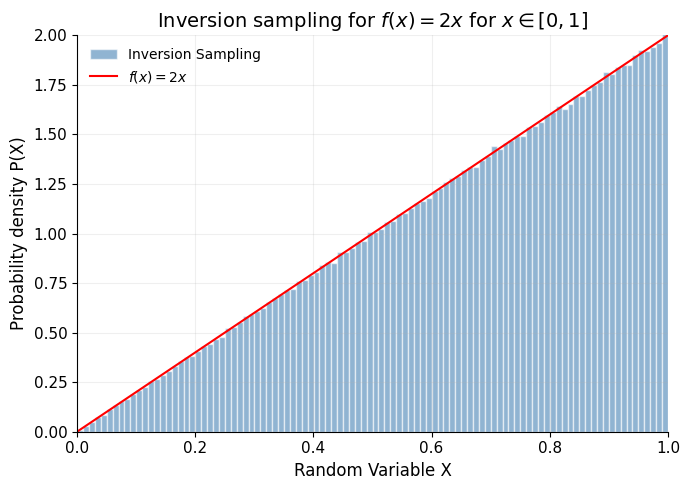

In [20]:
import numpy as np
import matplotlib.pyplot as plt
def inverse(u):
    return np.sqrt(u)
n = 1000000
rng = np.random.default_rng(42)
a = rng.uniform(0,1,n)
x = inverse(a)
mean = np.mean(x)
variance = np.var(x)
standard_deviation = np.std(x)
# calculating true function
x1 = np.linspace(0, 1, num=100000)
y1 = 2*x1
# calculating relative errors
per_err_mean = ((mean-(2/3))/(2/3))*100
per_err_var = ((variance - (1/18))/(1/18))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)
# plotting 
plt.figure(figsize=(7, 5))
plt.tick_params(axis='both', labelsize=11)
plt.grid(alpha=0.2)
plt.xlim(0, 1)
plt.ylim(0.0, 2.0)
plt.xlabel("Random Variable X", fontsize=12)
plt.ylabel("Probability density P(X)", fontsize=12)
plt.hist(x, bins=100, density=True, color="steelblue",alpha=0.6, edgecolor="white", label="Inversion Sampling")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Inversion sampling for $f(x) = 2x$ for $x\in[0,1]$", fontsize=14)
plt.tight_layout()
plt.plot(x1, y1, color="red", label="$f(x) = 2x$")
plt.legend(frameon=False)
plt.show()

Total data points are: 1000000
Mean is:  8.163153836817048e-05
varience is:  0.1666138889970399
Standard Deviation is:  0.4081836461655953


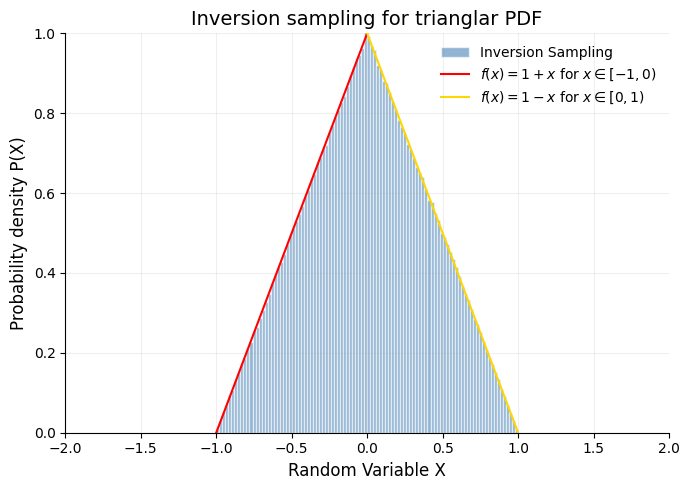

In [21]:
import numpy as np
import matplotlib.pyplot as plt
def inverse(u):
    if u < 0.5:
        return (-1 + np.sqrt(2*u))
    else:
        return (1 - np.sqrt(2*(1 - u)))
n = 1000000
rng = np.random.default_rng(42)
i = 0
x = []
while True:
    a = rng.uniform(0,1)
    y = inverse(a)
    x.append(y)
    i +=1
    if i == n:
        break
mean = np.mean(x)
variance = np.var(x)
standard_deviation = np.std(x)
print("Total data points are:", n)
print("Mean is: ",mean)
print("varience is: ",variance)
print("Standard Deviation is: ",standard_deviation)
x1 = np.linspace(-1, 0, num=50000)
y1 = x1 + 1
x2 = np.linspace(0, 1, num=50000)
y2 = 1 - x2
plt.figure(figsize=(7,5))
plt.grid(alpha=0.2)
plt.xlim(-2, 2)
plt.ylim(0.0, 1.0)
plt.xlabel("Random Variable X", fontsize=12)
plt.ylabel("Probability density P(X)", fontsize=12)
plt.title("Inversion sampling for trianglar PDF", fontsize=14)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.hist(x, bins=100, density=True, color="steelblue",alpha=0.6, edgecolor="white", label="Inversion Sampling")
plt.plot(x1, y1, color="red", label="$f(x) = 1+x$ for $x\in[-1,0)$")
plt.plot(x2, y2, color="gold", label="$f(x) = 1-x$ for $x\in[0,1)$")
plt.tight_layout()
plt.legend(frameon=False)
plt.show()

Total data points are: 1000000
Mean is:  0.6667143198057801
varience is:  0.055474269632888165
Acceptance rate is: 0.5002336090954476
Standard Deviation is:  0.23552976379406523
Percentage error in mean is: 0.007147970867021902
Percentage error in variance is: -0.14631466080129718


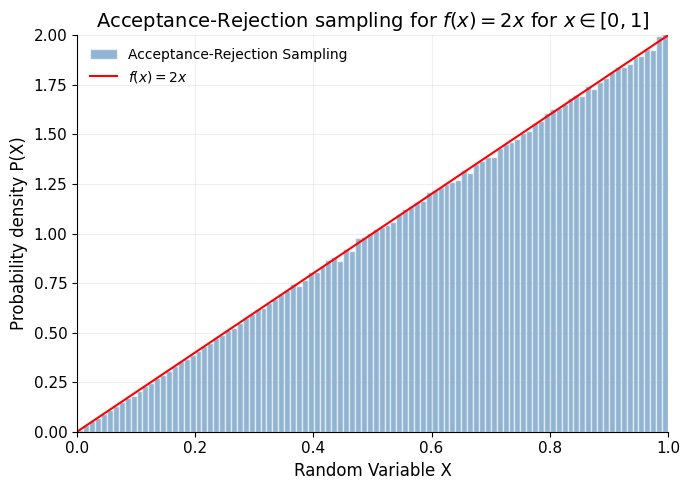

In [22]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000000
rng = np.random.default_rng(42)
i,j = 0,0
a = []
x_all = []
u_all = []
accepted = []
# ACCEPTANCE REJECTION ALGORITHM
while True:
    j = j+1
    u = rng.uniform(0,1)
    x = rng.uniform(0,1)
    u_all.append(u)
    x_all.append(x)
    if u <= x:
        a.append(x)
        accepted.append(True)
        i = i+1
    else:
        accepted.append(False)
    if i == n:
        break
mean = np.mean(a)
variance = np.var(a)
standard_deviation = np.std(a)
acc_rate = i/j
# calculating relative errors
per_err_mean = ((mean-(2/3))/(2/3))*100
per_err_var = ((variance - (1/18))/(1/18))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Acceptance rate is:", acc_rate)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)
x1 = np.linspace(0, 1, num=100000)
y1 = 2*x1
# plotting 
plt.figure(figsize=(7, 5))
plt.tick_params(axis='both', labelsize=11)
plt.grid(alpha=0.2)
plt.xlim(0, 1)
plt.ylim(0.0, 2.0)
plt.xlabel("Random Variable X", fontsize=12)
plt.ylabel("Probability density P(X)", fontsize=12)
plt.hist(a, bins=100, density=True, color="steelblue",alpha=0.6, edgecolor="white", label="Acceptance-Rejection Sampling")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Acceptance-Rejection sampling for $f(x) = 2x$ for $x\in[0,1]$", fontsize=14)
plt.tight_layout()
plt.plot(x1, y1, color="red", label="$f(x) = 2x$")
plt.legend(frameon=False)
plt.show()

Total data points are: 1000000
Mean is:  0.6667143198057801
varience is:  0.055474269632888165
Acceptance rate is: 0.5002336090954476
Standard Deviation is:  0.23552976379406523
Percentage error in mean is: 0.007147970867021902
Percentage error in variance is: -0.14631466080129718


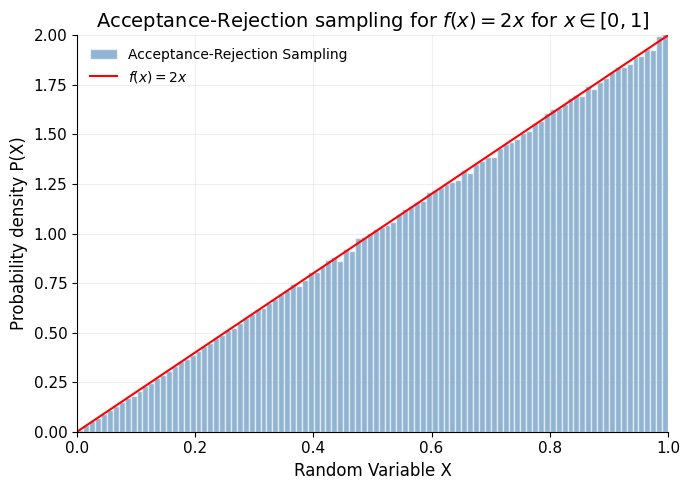

In [23]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000000
rng = np.random.default_rng(42)
i,j = 0,0
a = []
accepted = []
# ACCEPTANCE REJECTION ALGORITHM
while True:
    j = j+1
    u = rng.uniform(0,1)
    x = rng.uniform(0,1)
    if u <= x:
        a.append(x)
        i = i+1
    if i == n:
        break
mean = np.mean(a)
variance = np.var(a)
standard_deviation = np.std(a)
acc_rate = i/j
# calculating relative errors
per_err_mean = ((mean-(2/3))/(2/3))*100
per_err_var = ((variance - (1/18))/(1/18))*100
print("Total data points are:", len(a))
print("Mean is: ",mean)
print("varience is: ",variance)
print("Acceptance rate is:", acc_rate)
print("Standard Deviation is: ",standard_deviation)
print("Percentage error in mean is:", per_err_mean)
print("Percentage error in variance is:", per_err_var)
x1 = np.linspace(0, 1, num=100000)
y1 = 2*x1
# plotting 
plt.figure(figsize=(7, 5))
plt.tick_params(axis='both', labelsize=11)
plt.grid(alpha=0.2)
plt.xlim(0, 1)
plt.ylim(0.0, 2.0)
plt.xlabel("Random Variable X", fontsize=12)
plt.ylabel("Probability density P(X)", fontsize=12)
plt.hist(a, bins=100, density=True, color="steelblue",alpha=0.6, edgecolor="white", label="Acceptance-Rejection Sampling")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Acceptance-Rejection sampling for $f(x) = 2x$ for $x\in[0,1]$", fontsize=14)
plt.tight_layout()
plt.plot(x1, y1, color="red", label="$f(x) = 2x$")
plt.legend(frameon=False)
plt.show()

Total data points are: 1000000
Mean is:  -8.780184758015224e-05
varience is:  0.166406131879563
Standard Deviation is:  0.4079290770214388


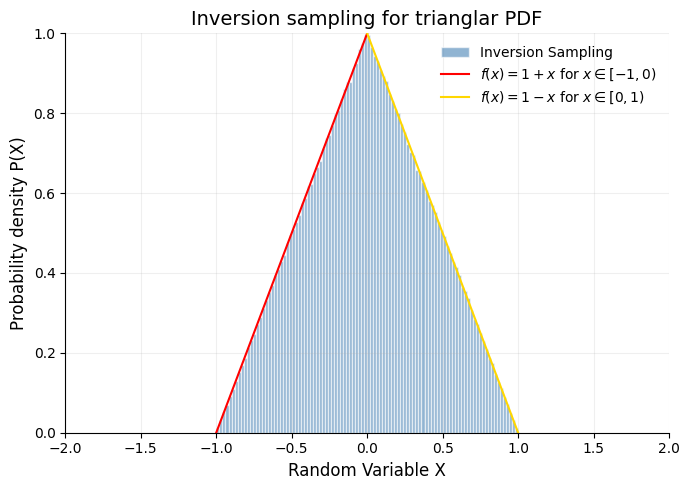

In [24]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000000
rng = np.random.default_rng(42)
i,j = 0,0
a = []
accepted = []
# ACCEPTANCE REJECTION ALGORITHM
while True:
    j = j+1
    u = rng.uniform(0,1)
    x = rng.uniform(-1,1)
    if x < 0:
        if u <= 1 + x:
            a.append(x)
            i = i+1
    else:
        if u <= 1-x:
            a.append(x)
            i = i+1
    if i == n:
        break
mean = np.mean(a)
variance = np.var(a)
standard_deviation = np.std(a)
print("Total data points are:", n)
print("Mean is: ",mean)
print("varience is: ",variance)
print("Standard Deviation is: ",standard_deviation)
x1 = np.linspace(-1, 0, num=50000)
y1 = x1 + 1
x2 = np.linspace(0, 1, num=50000)
y2 = 1 - x2
plt.figure(figsize=(7,5))
plt.grid(alpha=0.2)
plt.xlim(-2, 2)
plt.ylim(0.0, 1.0)
plt.xlabel("Random Variable X", fontsize=12)
plt.ylabel("Probability density P(X)", fontsize=12)
plt.title("Inversion sampling for trianglar PDF", fontsize=14)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.hist(a, bins=100, density=True, color="steelblue",alpha=0.6, edgecolor="white", label="Inversion Sampling")
plt.plot(x1, y1, color="red", label="$f(x) = 1+x$ for $x\in[-1,0)$")
plt.plot(x2, y2, color="gold", label="$f(x) = 1-x$ for $x\in[0,1)$")
plt.tight_layout()
plt.legend(frameon=False)
plt.show()


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
BASE_DIR = os.path.dirname(os.path.abspath(__file__))
DATA_PATH = os.path.join(BASE_DIR, "coords_LJ.dat")
positions = np.loadtxt(DATA_PATH, skiprows=2)
def LJ_pot(epsilon, sigma, r):
    term = (sigma/r)**6
    potential = 4*epsilon*((term)**2 - term)
    return potential
n = positions.shape[0]
r_cuts = np.linspace(1, 4, 20)
l = 8
epsilon = 1
sigma = 1
U_short_list, U_long_list, U_total_list, = [], [], []
for r_cut in r_cuts:
    u = 0.0
    u_short = 0.0
    for i in range(n):
        for j in range(i+1, n):
            r_ij = positions[i] - positions[j]
            r_ij -= l*np.round(r_ij/l)
            r = np.linalg.norm(r_ij)
            if r < r_cut:
                u_short += LJ_pot(epsilon, sigma, r)
    rho = n**2/l**3
    u_long = (8*np.pi/3)*rho*epsilon*sigma**3*((1/3)*(sigma/r_cut)**9 - (sigma/r_cut)**3)
    u_total = u_short + u_long
    U_short_list.append(u_short)
    U_long_list.append(u_long)
    U_total_list.append(u_total)
    print(f"r_c = {r_cut:.2f}, U_total = {u_total:.3f}")
plt.plot(r_cuts, U_total_list, marker='o')
plt.plot(r_cuts, U_short_list, marker='o')
plt.plot(r_cuts, U_long_list, marker='o')
plt.xlabel(r"Cut-off radius $r_c$")
plt.ylabel("Total Energy")
plt.grid()
plt.show()

NameError: name '__file__' is not defined